# Ejercicio Interpolación

E. Para el conjunto de datos:


|x|1|2|3|4|5|6|7|8|9|10|
|-|-|-|-|-|-|-|-|-|-|-|
|y| 0.635|0.383|0.268|0.206|0.1367|?|0.383|0.268|0.206|0.090|


Ajuste a un polinomio de interpolación los datos dados, empleando cada uno de los siguientes métodos:

####Newton
####Lagrange
####Trazadores cúbicos

Con el polinomio encontrado, determine el valor en 𝑥 = 6

Haga un análisis de resultados basándose en la teoría y en los
resultados obtenidos. Debe incluir referencias a la bibliografía
empleada usando las normas APA. Comentarios sin referencias
no serán tenidos en cuenta.

# Polinomio de interpolacion de Newton

El primer paso para hallar la fórmula de la interpolación es definir la pendiente de orden {\displaystyle n}n de manera recursiva:

$$b_0=f(x_0) \hspace{1 cm}$$
$$b_1=f[x_1,x_0] \hspace{1 cm}$$
$$b_2=f[x_2,x_1,x_0] \hspace{1 cm}$$
$$ ... \hspace{1 cm}$$
$$b_n=f[x_n,x_{n-1},...,x_1,x_0] \hspace{1 cm}$$

En general

$$f[x_n,x_{n-1},...,x_1,x_0]=\frac{f[x_n,x_{n-1},...,x_1]-f[x_{n-1},x_{n-2},...,x_0]}{x_n-x_0} \hspace{1 cm}$$

con $f[x_i]=f(x_i)$.

Entonces el polinomio de interpolación es

$$f_n(x)=f(x_0)+f[x_1,x_0](x-x_0)+f[x_2,x_1,x_0](x-x_0)(x-x_1)+...+f[x_n,x_{n-1},...,x_0](x-x_0)(x-x_1)...(x-x_{n-1})
\hspace{1 cm}$$








Interpolacion por polinomio de Newton
Polinomio de Newton:  -0.252*x + (0.00195920138888889 - 0.00195920138888889*x)*(x - 8)*(x - 7)*(x - 5)*(x - 4)*(x - 3)*(x - 2) + (0.014 - 0.014*x)*(x - 3)*(x - 2) + (0.0248958333333333 - 0.0248958333333333*x)*(x - 5)*(x - 4)*(x - 3)*(x - 2) + (0.000379979607583774*x - 0.000379979607583774)*(x - 9)*(x - 8)*(x - 7)*(x - 5)*(x - 4)*(x - 3)*(x - 2) + (0.00805853174603175*x - 0.00805853174603175)*(x - 7)*(x - 5)*(x - 4)*(x - 3)*(x - 2) + (0.05225*x - 0.05225)*(x - 4)*(x - 3)*(x - 2) + (0.0685*x - 0.0685)*(x - 2) + 0.887
P(6):  1.477
--------------------------------------------


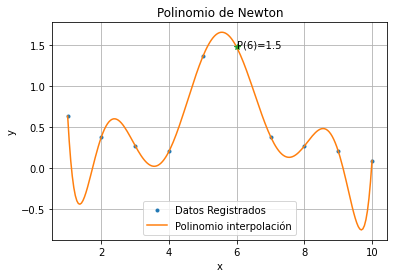

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

X=np.array([1,2,3,4,5,7,8,9,10])
Y=np.array([0.635,0.383,0.268,0.206,1.367,0.383,0.268,0.206,0.090])
n=len(X)

x= sp.Symbol('x')
M=np.zeros([n,n])
M[:,0]=Y
for j in range(1,n):
    for i in range(0,n-j):
        M[i][j]=(M[i+1][j-1]-M[i][j-1])/(X[i+j]-X[i])

Coeficientes=M[0]

Polinomio=Coeficientes[0]
for i in range(1,n):
    Termino=Coeficientes[i] 
    for j in range(0,i):
        Termino*=(x-X[j])
    Polinomio+=Termino

print("Interpolacion por polinomio de Newton")

print("Polinomio de Newton: ", Polinomio)

Pol_Newton=sp.lambdify(x,Polinomio)

print("P(6): ", '{:.4}'.format(Pol_Newton(6)))

print("--------------------------------------------")

t=np.linspace(1,10,200)

plt.figure()
plt.title("Polinomio de Newton")
plt.plot(X,Y,".",label="Datos Registrados")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(t,Pol_Newton(t),label="Polinomio interpolación")
plt.legend()
plt.text(6,Pol_Newton(6),r'P(6)=''{:.2}'.format(Pol_Newton(6)))
plt.plot(6,Pol_Newton(6),'*')
plt.show()

# Polinomio de Lagrange

Consiste en encontrar un polinomio de grado n que pase por los puntos (x0, f(x0)), (x1, f(x1)), ... (xn, f(xn)), se construye un cociente Ln,k(xk)

$$L_i(x)=\prod_{j=0 {j\neq i}}^n \frac{x-x_j}{x_i-x_j} \hspace{1 cm}$$

Finalmente el polinomio corresponde a:

$$f_n(x)=\sum_{i=0}^n L_i(x)f(x_i)  \hspace{1 cm}$$

Interpolacion por polinomios de lagrange
Polinomio de Lagrange:  (10/9 - x/9)*(9/8 - x/8)*(8/7 - x/7)*(7/6 - x/6)*(5/4 - x/4)*(1.27 - 0.635*x)*(4/3 - x/3)*(3/2 - x/2) + (5/4 - x/8)*(9/7 - x/7)*(4/3 - x/6)*(7/5 - x/5)*(5/3 - x/3)*(2 - x/2)*(3 - x)*(0.383*x - 0.383) + (10/7 - x/7)*(3/2 - x/6)*(8/5 - x/5)*(7/4 - x/4)*(5/2 - x/2)*(4 - x)*(0.134*x - 0.134)*(x - 2) + (5/3 - x/6)*(9/5 - x/5)*(2 - x/4)*(7/3 - x/3)*(5 - x)*(0.0686666666666667*x - 0.0686666666666667)*(x/2 - 1)*(x - 3) + (2 - x/5)*(9/4 - x/4)*(8/3 - x/3)*(7/2 - x/2)*(x/3 - 2/3)*(0.34175*x - 0.34175)*(x/2 - 3/2)*(x - 4) + (10/3 - x/3)*(9/2 - x/2)*(8 - x)*(0.0638333333333333*x - 0.0638333333333333)*(x/5 - 2/5)*(x/4 - 3/4)*(x/3 - 4/3)*(x/2 - 5/2) + (5 - x/2)*(9 - x)*(0.0382857142857143*x - 0.0382857142857143)*(x/6 - 1/3)*(x/5 - 3/5)*(x/4 - 1)*(x/3 - 5/3)*(x - 7) + (10 - x)*(0.02575*x - 0.02575)*(x/7 - 2/7)*(x/6 - 1/2)*(x/5 - 4/5)*(x/4 - 5/4)*(x/2 - 7/2)*(x - 8) + (0.01*x - 0.01)*(x/8 - 1/4)*(x/7 - 3/7)*(x/6 - 2/3)*(x/5 - 1)*(x/3 - 7

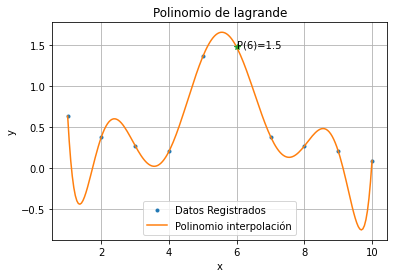

In [12]:
Polinomio=0
for i in range(n):
    Termino=Y[i]
    for k in range(n):
        if i!=k:
            Termino*=(x-X[k])/(X[i]-X[k])
    Polinomio+=Termino
    
print("Interpolacion por polinomios de lagrange")
print("Polinomio de Lagrange: ", Polinomio)
Pol_lagrange=sp.lambdify(x,Polinomio)
print("P(6)=", '{:.4}'.format(Pol_lagrange(6)))
print("--------------------------------------------")

plt.figure()
plt.title("Polinomio de lagrande")
plt.plot(X,Y,".",label="Datos Registrados")
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(t,Pol_lagrange(t),label="Polinomio interpolación")
plt.legend()
plt.text(6,Pol_lagrange(6),r'P(6)=''{:.2}'.format(Pol_lagrange(6)))
plt.plot(6,Pol_lagrange(6),'*')
plt.show()


# Trazadores Cubicos

Un polinomio cubico general contiine cuatro constantes 

$$f_i(x)=a_ix^3+b_ix^2+c_i x+d_i \hspace{1 cm}$$

Cuyas condiciones de construccion:

1. Los valores de la función deben ser iguales en los nodos interiores ($2n-2$ condiciones).
2. La primera y última función deben pasar a través de los puntos extremos ($2$ condiciones).
3. Las primeras derivadas en los nodos interiores deben ser iguales ($n–1$ condiciones).
4. Las segundas derivadas en los nodos interiores deben ser iguales ($n–1$ condiciones).
5. Las segundas derivadas en los nodos extremos son cero ($2$ condiciones).

El polinomio en el intervalo $i$ es:

$$f_i(x)=\frac{f_i''(x_{i-1})}{6(x_i-x_{i-1})}(x_i-x)^3 + \frac{f_i''(x_{i})}{6(x_i-x_{i-1})}(x-x_{i-1})^3+\left[\frac{f(x_{i-1})}{x_i-x_{i-1}}-\frac{f''(x_{i-1})(x_i-x_{i-1})}{6}\right](x_i-x)+\left[\frac{f(x_{i})}{x_i-x_{i-1}}-\frac{f''(x_{i})(x_i-x_{i-1})}{6}\right](x-x_{i-1}) \hspace{1 cm}$$

Hay dos incógnitas en esta ecuación, a saber, las segundas derivadas en los extremos de cada intervalo, las cuales se encuentran empleando la siguiente ecuación:

$$(x_i-x_{i-1})f''(x_{i-1})-2(x_{i+1}-x_{i-1})f''(x_i)-(x_{i+1}-x_i)f''(x_{i+1})=\frac{6}{x_{i+1}-x_i}[f(x_{i+1})-f(x_i)]+\frac{6}{x_i-x_{i-1}}[f(x_{i-1})-f(x_i)] \hspace{1 cm}$$


Estos valores se encuentran resolviendo un sistema de ecuaciones lineales $n\times n$ de la forma $Ax=b$, donde:

$$x=(f''(x_0),f''(x_1),\dots,f''(x_n)) \hspace{1 cm}$$

 
$$b=(0,\frac{6}{x_{2}-x_1}[f(x_{2})-f(x_1)]+\frac{6}{x_1-x_{0}}[f(x_{0})-f(x_1)],\dots,\frac{6}{x_n-x_{n-1}}[f(x_n)-f(x_{n-1})]+\frac{6}{x_{n-1}-x_{n-2}}[f(x_{n-2})-f(x_{n-1})],0) \hspace{1 cm}$$


y $A[1][1]=A[n][n]=1$, y en la $i$-ésima fila de $A$ los únicos valores distintos de cero son:

$$A[i][i-1]=x_i-x_{i-1}\hspace{1 cm}$$

$$A[i][i]=x_{i+1}-x_{i-1}\hspace{1 cm}$$

$$A[i][i+1]=x_{i+1}-x_i\hspace{1 cm}$$


Interpolacion por trazadores Cubicos
Polinomio por trazadores cubicos [ 1 , 2 ]= -0.314214880805081*x + 0.0622148808050813*(x - 1)**3 + 0.949214880805081
Interpolacion por trazadores Cubicos
Polinomio por trazadores cubicos [ 2 , 3 ]= 0.0590744040254063*x + 0.0622148808050813*(3 - x)**3 - 0.111859523220325*(x - 2)**3 + 0.202636311144106
Interpolacion por trazadores Cubicos
Polinomio por trazadores cubicos [ 3 , 4 ]= -0.612082735296544*x - 0.111859523220325*(4 - x)**3 + 0.438223212076219*(x - 3)**3 + 2.21610772910996
Interpolacion por trazadores Cubicos
Polinomio por trazadores cubicos [ 4 , 5 ]= 2.01725653716077*x + 0.438223212076219*(5 - x)**3 - 0.41803332508455*(x - 4)**3 - 8.30124936071929
Interpolacion por trazadores Cubicos
Polinomio por trazadores cubicos [ 5 , 7 ]= -1.74504338860018*x - 0.209016662542275*(7 - x)**3 + 0.10424418460777*(x - 5)**3 + 11.7643502433391
Interpolacion por trazadores Cubicos
Polinomio por trazadores cubicos [ 7 , 8 ]= 0.131351934339685*x + 0.208488369215

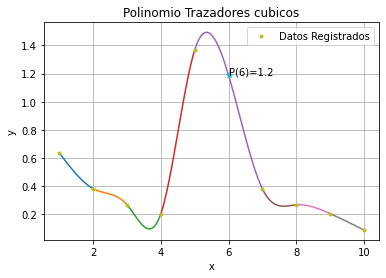

In [16]:
x= sp.Symbol('x')
Trazador_cubico=[]

A=np.zeros([n,n])
A[0][0]=1
A[n-1][n-1]=1

for i in range(1,n-1):
        A[i][i-1]=X[i]-X[i-1]
        A[i][i]=2*(X[i+1]-X[i-1])
        A[i][i+1]=X[i+1]-X[i]
        
b=np.zeros(n)
for i in range(1,n-1):
    b[i]=6*(Y[i+1]-Y[i])/(X[i+1]-X[i])+6*(Y[i-1]-Y[i])/(X[i]-X[i-1])

df_2=np.linalg.solve(A,b)

for i in range(1,n):
    T_1=(df_2[i-1]*(X[i]-x)**3)/(6*(X[i]-X[i-1]))
    T_2=(df_2[i]*(x-X[i-1])**3)/(6*(X[i]-X[i-1]))
    T_3=(Y[i-1]/(X[i]-X[i-1]) - df_2[i-1]*(X[i]-X[i-1])/6)*(X[i]-x)
    T_4=(Y[i]/(X[i]-X[i-1]) - df_2[i]*(X[i]-X[i-1])/6)*(x-X[i-1])
    Trazador_cubico.append(T_1+T_2+T_3+T_4)

Spline_cubico=[]
for i in range(n-1):
    Spline_cubico.append(sp.lambdify(x,Trazador_cubico[i]))
    print("Interpolacion por trazadores Cubicos")
    print("Polinomio por trazadores cubicos [",X[i],",",X[i+1],"]=",Trazador_cubico[i])

print("P(6)= ", '{:.4}'.format(Spline_cubico[4](6)))

for i in range(n-1):
    t=np.linspace(X[i],X[i+1],30)
    plt.plot(t, Spline_cubico[i](t))
    
plt.title("Polinomio Trazadores cubicos")
plt.plot(X,Y,".",label="Datos Registrados")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.plot(6,Spline_cubico[4](6),'*')
plt.text(6,Spline_cubico[4](6),r'P(6)=''{:.2}'.format(Spline_cubico[4](6)))
plt.show()


# Analisis de Resultados
En los resultados podemos observar como debido a la distribucion de los datos registrados se observa la aparicion del fenomeno Runge por lo que la aproximacion obtenida por el metodo de trazadores cubicos, es la mas exacta. Los polinomios de interpolacion de Newton y de Lagrange funcionan como aproximacion, aunque es mas confiable la aproximacion realizada por el metodo de trazadores cubicos

# Referencias
Canale, R. P. y P. Canale, R. (2007). Métodos numéricos para ingenieros (5a. ed.). México D.F, México: McGraw-Hill Interamericana. (pp. 503 – 522 y 525 – 536).